# Stock Return & Distribution

In all our analyses, we use estimations for either simple or logarithmic rates of return. Deepending on the data we use (for example when we work with crosssectional data we need to use simple rates of return).<br/>

The formula for simple returns is

$$
\frac{P_t - P_{t-1}}{P_{t-1}}
,$$

while the formula for log returns is

$$
ln( \frac{P_t}{P_{t-1}} )
.$$



Calculate the same formula for log returns with the help of the .pct_change(). 

Mathematically, it will look like this:

$$
ln(\frac{P_t}{P_{t-1}} ) = ln( \frac{P_t - P_{t-1}}{P_{t-1}} + \frac{P_{t-1}}{P_{t-1}}) = ln(\ simple.returns + 1) 
$$ = np.log($P_t$.pct_change() + 1).

In [44]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.pylabtools import figsize
figsize(12.5, 5)


import matplotlib.pyplot as plt
import warnings
plt.style.use('dark_background')
warnings.simplefilter(action='ignore', category=FutureWarning)


import pandas as pd
from pandas.tseries.offsets import BDay


import sys
sys.path.insert(0, '../scripts/')

import numpy as np
from database import Stock
import utilities as ut
from utilities import clean_ticker
from utilities import clean_tickers
from utilities import fill_na 

import scipy.stats as stats

p = print

from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import plotnine as pn
import mizani.breaks as mzb
import mizani.formatters as mzf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-ticks')
plt.rcParams['font.family'] = 'DejaVu Sans Mono'
plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)
#=========================================================================
# Plot the Distribution of Return Data
#=========================================================================
def add_mean_std_text(x, **kwargs):
    """fn: add mean, std text to seaborn plot
    
    # Args
        x : pd.Series()
    """
    mean, std = x.mean(), x.std()
    mean_tx = f"mean: {mean:.4%}\nstd: {std:.4%}"
    
    txkw = dict(size=14, fontweight='demi', color='red', rotation=0)
    ymin, ymax = plt.gca().get_ylim()
    plt.text(mean+0.025, 0.8*ymax, mean_tx, **txkw)
    return

def plot_dist(rs, ex):
    """fn: to plot single distro with fitted histograms using FacetGrid
    
    # Args
        rs : pd.DataFrame(), return df
        ex : str(), security/column name
    """    
    plt.style.use('dark_background')
    plt.rcParams['font.size'] = 14
    g = (rs
         .pipe(sns.FacetGrid, 
               size=5,
               aspect=1.5)
         .map(sns.distplot, ex, kde=False, fit=stats.norm,
              fit_kws={'color':green, 'lw':2.5, 'label':'norm'})
         .map(sns.distplot, ex, kde=False, fit=stats.laplace,
              fit_kws={'linestyle':'--', 'color':gold, 'lw':2.5, 'label':'laplace'})
         .map(sns.distplot, ex, kde=False, fit=stats.johnsonsu,
              fit_kws={'linestyle':'-', 'color':red, 'lw':2.5, 'label':'jsu'})
         .map(add_mean_std_text, ex))
    g.add_legend()
    sns.despine(offset=1)
    plt.title('Return Distribution')
    return
    
def plot_facet_hist(rs, ex):
    """fn: to plot multiple fitted histograms using FacetGrid
    
    # Args
        rs : pd.DataFrame(), return df
        ex : str(), security/column name
    """
    plt.style.use('dark_background')
    
    plt.rcParams['font.size'] = 12
    df = rs.assign(year=lambda df: df.index.year)
    g = (sns.FacetGrid(df, col='year',col_wrap=2, size=4, aspect=1.2) # make sure to add legend
         .map(sns.distplot, ex, kde=False, fit=stats.norm,
              fit_kws={'color':green, 'lw':2.5, 'label':'norm'})
         .map(sns.distplot, ex, kde=False, fit=stats.laplace,
              fit_kws={'linestyle':'--', 'color':gold, 'lw':2.5, 'label':'laplace'})
         .map(sns.distplot, ex, kde=False, fit=stats.johnsonsu,
              fit_kws={'linestyle':'-', 'color':red, 'lw':2.5, 'label':'jsu'})
         .map(add_mean_std_text, ex))

    g.add_legend()
    g.fig.subplots_adjust(hspace=.20)
    sns.despine(offset=1)
    return

# Load The Data
 lets import the data. First we load the datastore we saved before and then we will have a look at how to import the xlsx files.

#### Stocks in our portfolio

Stock 1 -  Take-Two Interactive Software (ttwo)

Stock 2 -  CD Projekt S.A. (7cdf)

Stock 3 -  GameStop Corp. (gme)

Stock 4 -  Activision Blizzard, Inc. (atvi)

Stock 5 - Capcom Co., Ltd. (ccoey)

Stock 6 - Tencent Holdings Limited (tcehy)

Stock 7 - Electronic Arts Inc. (ea)

#### Load the closing price from datastore

In [11]:
Symbols = ['TTWO', '7CD.F', 'GME', 'ATVI', 'CCOEY', 'TCEHY', 'EA']
symbols =clean_tickers(Symbols )
FILE = '../data/stock_data/hdf/portfolio_one.h5'

get_px = lambda x: pd.read_hdf(FILE, mode='r', key=x)['Close']
stocks = pd.DataFrame({sym:get_px(sym) for sym in symbols})

In [12]:
stocks

,ttwo,7cdf,gme,atvi,ccoey,tcehy,ea
Date,,,,,,,
2001-10-29,8.86,NaN,NaN,2.81,NaN,NaN,26.31
2001-10-30,8.70,NaN,NaN,2.73,NaN,NaN,25.57
2001-10-31,9.29,NaN,NaN,2.70,NaN,NaN,25.70
2001-11-01,9.93,NaN,NaN,2.86,NaN,NaN,26.46
2001-11-02,9.97,NaN,NaN,2.91,NaN,NaN,27.41
...,...,...,...,...,...,...,...
2021-02-15,NaN,60.48,NaN,NaN,NaN,NaN,NaN
2021-02-16,195.79,60.44,49.51,102.96,32.50,96.10,145.78
2021-02-17,195.93,59.50,45.94,102.35,33.00,97.31,145.83


#### Load the closing price from excel files

In [16]:
FILE_x = '../data/stock_data/xlsx/'

get_px_x = lambda x: pd.read_excel(FILE_x+x+".xlsx").set_index('Date')['Close']
stocks = pd.DataFrame({sym:get_px_x(sym) for sym in Symbols})

In [17]:
stocks

,TTWO,7CD.F,GME,ATVI,CCOEY,TCEHY,EA
Date,,,,,,,
2001-10-29,8.86,NaN,NaN,2.81,NaN,NaN,26.31
2001-10-30,8.70,NaN,NaN,2.73,NaN,NaN,25.57
2001-10-31,9.29,NaN,NaN,2.70,NaN,NaN,25.70
2001-11-01,9.93,NaN,NaN,2.86,NaN,NaN,26.46
2001-11-02,9.97,NaN,NaN,2.91,NaN,NaN,27.41
...,...,...,...,...,...,...,...
2021-02-15,NaN,60.48,NaN,NaN,NaN,NaN,NaN
2021-02-16,195.79,60.44,49.51,102.96,32.50,96.10,145.78
2021-02-17,195.93,59.50,45.94,102.35,33.00,97.31,145.83


### Calculate the return

the return of the stock closing price can be calculated as:

In [18]:
(stocks/stocks.shift(1))-1

,TTWO,7CD.F,GME,ATVI,CCOEY,TCEHY,EA
Date,,,,,,,
2001-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-30,-0.018059,NaN,NaN,-0.028470,NaN,NaN,-0.028126
2001-10-31,0.067816,NaN,NaN,-0.010989,NaN,NaN,0.005084
2001-11-01,0.068891,NaN,NaN,0.059259,NaN,NaN,0.029572
2001-11-02,0.004028,NaN,NaN,0.017483,NaN,NaN,0.035903
...,...,...,...,...,...,...,...
2021-02-15,NaN,0.024043,NaN,NaN,NaN,NaN,NaN
2021-02-16,NaN,-0.000661,NaN,NaN,NaN,NaN,NaN
2021-02-17,0.000715,-0.015553,-0.072107,-0.005925,0.015385,0.012591,0.000343


or a more simple method

In [19]:
stocks.pct_change()

,TTWO,7CD.F,GME,ATVI,CCOEY,TCEHY,EA
Date,,,,,,,
2001-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-30,-0.018059,NaN,NaN,-0.028470,NaN,NaN,-0.028126
2001-10-31,0.067816,NaN,NaN,-0.010989,NaN,NaN,0.005084
2001-11-01,0.068891,NaN,NaN,0.059259,NaN,NaN,0.029572
2001-11-02,0.004028,NaN,NaN,0.017483,NaN,NaN,0.035903
...,...,...,...,...,...,...,...
2021-02-15,0.000000,0.024043,0.000000,0.000000,0.000000,0.000000,0.000000
2021-02-16,-0.020364,-0.000661,-0.055153,-0.008188,-0.010654,-0.030272,-0.013267
2021-02-17,0.000715,-0.015553,-0.072107,-0.005925,0.015385,0.012591,0.000343


therefore a simple way of calculating the log returns

In [20]:
np.log(stocks.pct_change() + 1)

,TTWO,7CD.F,GME,ATVI,CCOEY,TCEHY,EA
Date,,,,,,,
2001-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-30,-0.018224,NaN,NaN,-0.028883,NaN,NaN,-0.028529
2001-10-31,0.065616,NaN,NaN,-0.011050,NaN,NaN,0.005071
2001-11-01,0.066622,NaN,NaN,0.057570,NaN,NaN,0.029143
2001-11-02,0.004020,NaN,NaN,0.017331,NaN,NaN,0.035274
...,...,...,...,...,...,...,...
2021-02-15,0.000000,0.023759,0.000000,0.000000,0.000000,0.000000,0.000000
2021-02-16,-0.020574,-0.000662,-0.056732,-0.008222,-0.010712,-0.030740,-0.013355
2021-02-17,0.000715,-0.015675,-0.074838,-0.005942,0.015267,0.012512,0.000343


#### Definition of Simple and Log Returns in Python

In [22]:
def to_return(prices,ret='simple'):
    if ret == 'simple':
        ret = (prices/prices.shift(1))-1
    else:
        ret = np.log(prices/prices.shift(1))
    return ret

This will be saved in scripts/ utilities.py 

#### Simple Return

In [23]:
ret = to_return(stocks, ret="simple")

In [24]:
ret

,TTWO,7CD.F,GME,ATVI,CCOEY,TCEHY,EA
Date,,,,,,,
2001-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-30,-0.018059,NaN,NaN,-0.028470,NaN,NaN,-0.028126
2001-10-31,0.067816,NaN,NaN,-0.010989,NaN,NaN,0.005084
2001-11-01,0.068891,NaN,NaN,0.059259,NaN,NaN,0.029572
2001-11-02,0.004028,NaN,NaN,0.017483,NaN,NaN,0.035903
...,...,...,...,...,...,...,...
2021-02-15,NaN,0.024043,NaN,NaN,NaN,NaN,NaN
2021-02-16,NaN,-0.000661,NaN,NaN,NaN,NaN,NaN
2021-02-17,0.000715,-0.015553,-0.072107,-0.005925,0.015385,0.012591,0.000343


#### Log Return

In [25]:
log_ret = to_return(stocks, ret="log")

In [26]:
log_ret

,TTWO,7CD.F,GME,ATVI,CCOEY,TCEHY,EA
Date,,,,,,,
2001-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-30,-0.018224,NaN,NaN,-0.028883,NaN,NaN,-0.028529
2001-10-31,0.065616,NaN,NaN,-0.011050,NaN,NaN,0.005071
2001-11-01,0.066622,NaN,NaN,0.057570,NaN,NaN,0.029143
2001-11-02,0.004020,NaN,NaN,0.017331,NaN,NaN,0.035274
...,...,...,...,...,...,...,...
2021-02-15,NaN,0.023759,NaN,NaN,NaN,NaN,NaN
2021-02-16,NaN,-0.000662,NaN,NaN,NaN,NaN,NaN
2021-02-17,0.000715,-0.015675,-0.074838,-0.005942,0.015267,0.012512,0.000343


#### Dealing with NaN values

In [28]:
ret.dropna()

,TTWO,7CD.F,GME,ATVI,CCOEY,TCEHY,EA
Date,,,,,,,
2018-06-19,-0.023697,-0.073129,0.035791,-0.008079,0.009532,-0.015391,-0.012235
2018-06-20,0.001528,-0.005030,-0.002073,-0.005123,0.019742,-0.000198,0.003149
2018-06-21,-0.012796,0.002661,-0.011773,-0.010300,0.056397,-0.017217,-0.002721
2018-06-22,0.003948,-0.029724,-0.000701,-0.000934,0.009562,0.010270,-0.013220
2018-06-25,-0.001966,0.047046,-0.025947,-0.016827,0.000000,-0.032888,-0.005246
...,...,...,...,...,...,...,...
2021-02-11,-0.013512,-0.005017,-0.001953,0.004671,-0.009532,0.009616,0.018809
2021-02-12,0.013900,-0.007395,0.025440,0.005521,-0.041995,0.004154,0.002783
2021-02-17,0.000715,-0.015553,-0.072107,-0.005925,0.015385,0.012591,0.000343


## The Distribution of Return Data

We take the log returns to analyse the distribution.

In [30]:
log_ret=log_ret.dropna()

## Plot the Distribution

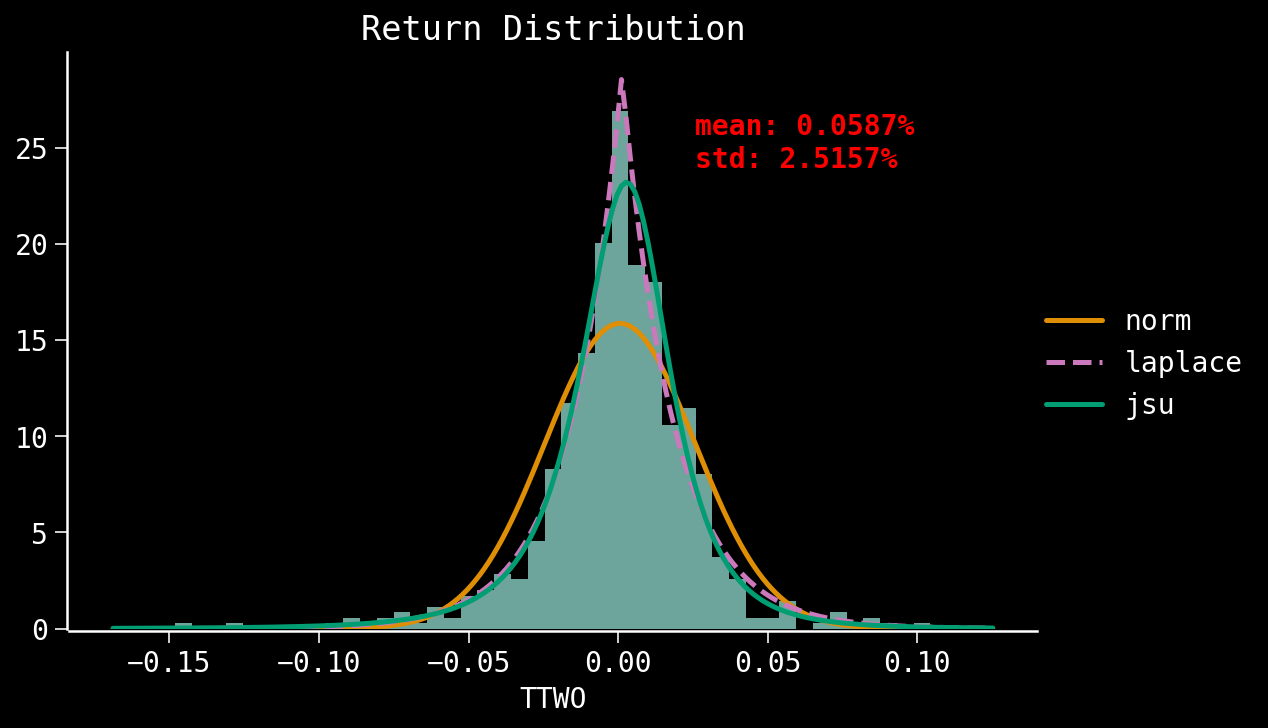

In [45]:
plot_dist(log_ret, "TTWO")

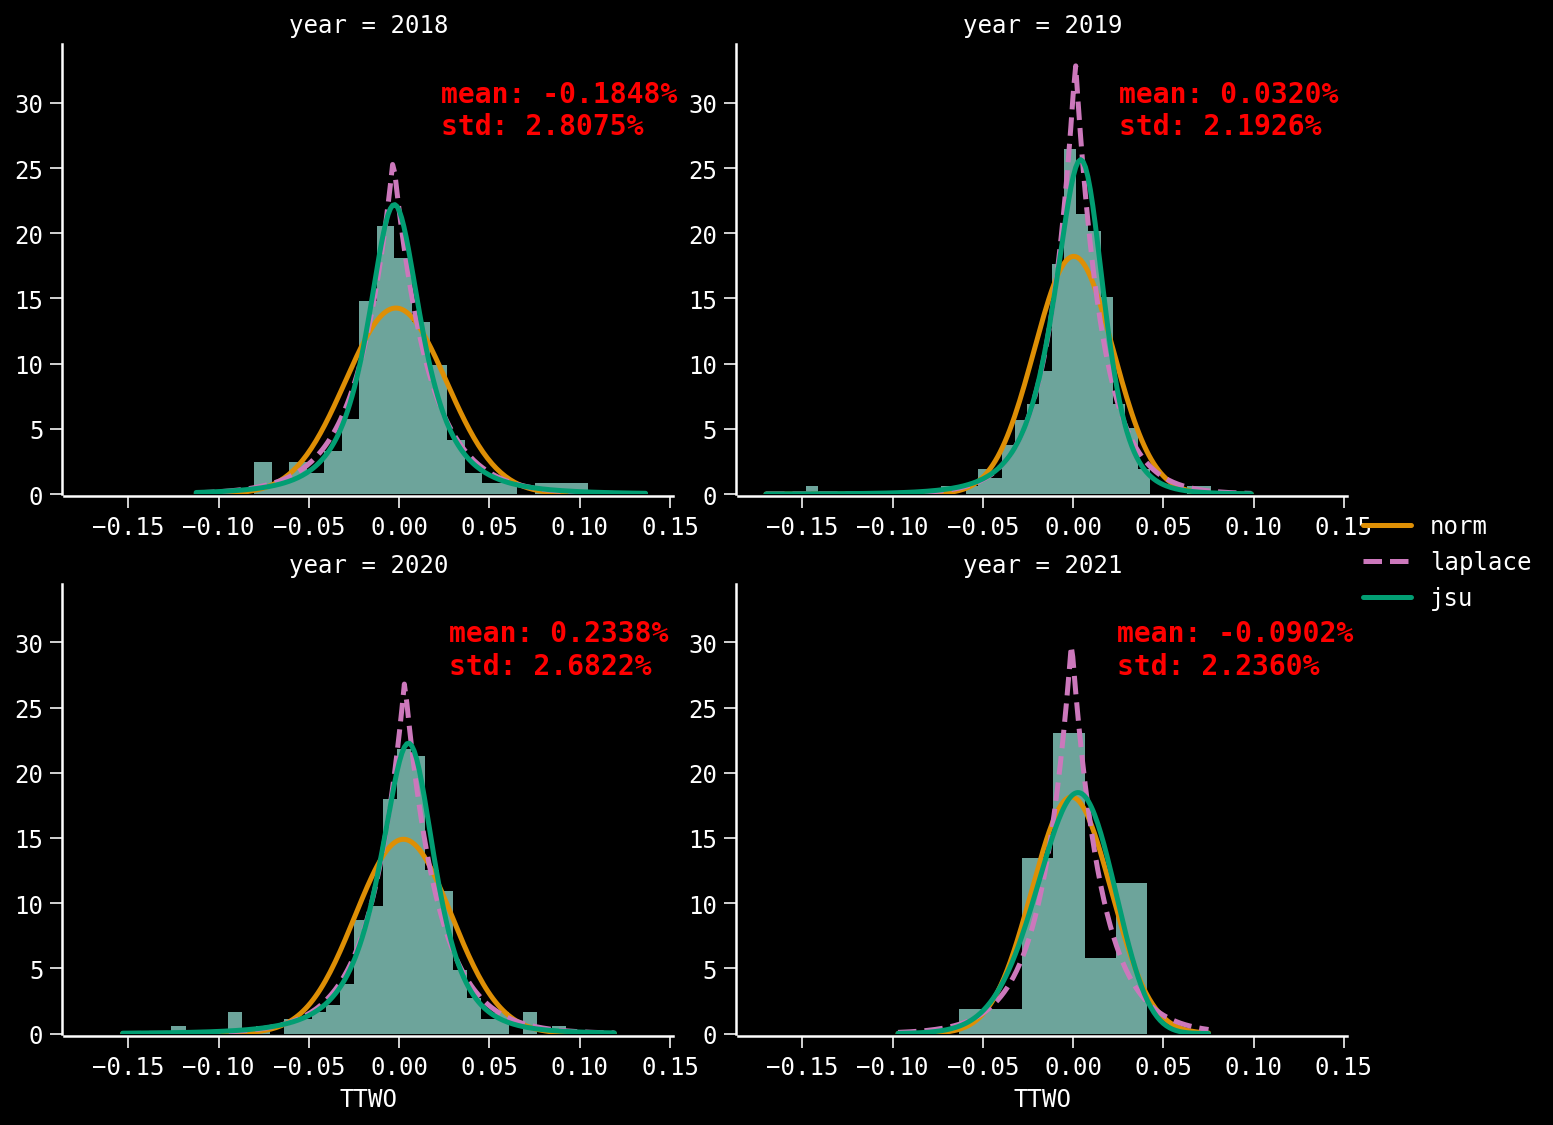

In [46]:
plot_facet_hist(log_ret, "TTWO")

#### Loop for plotting the distribution

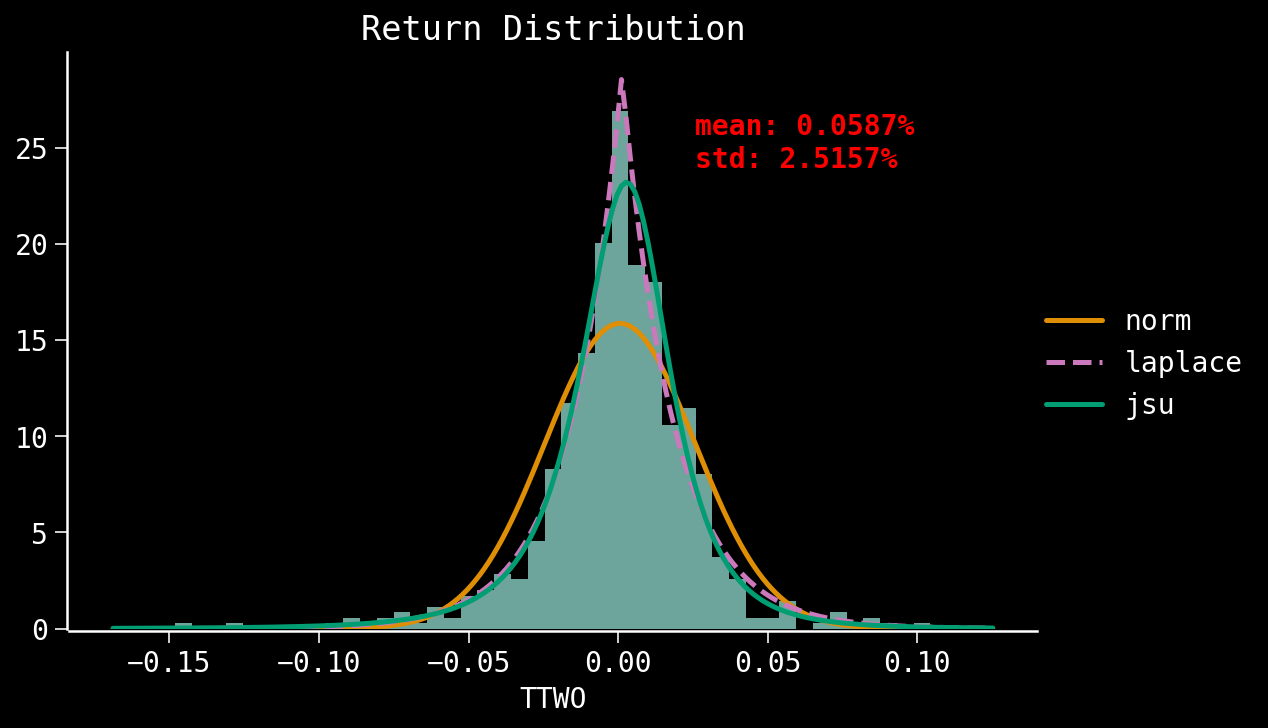

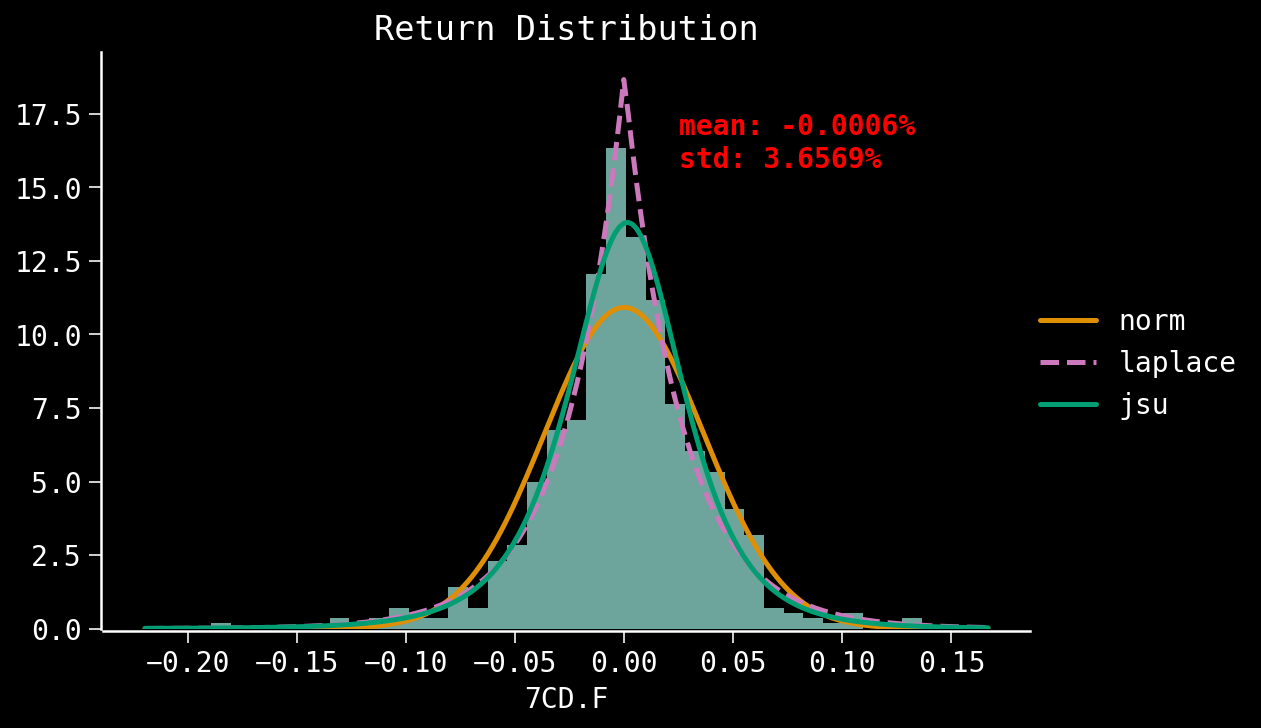

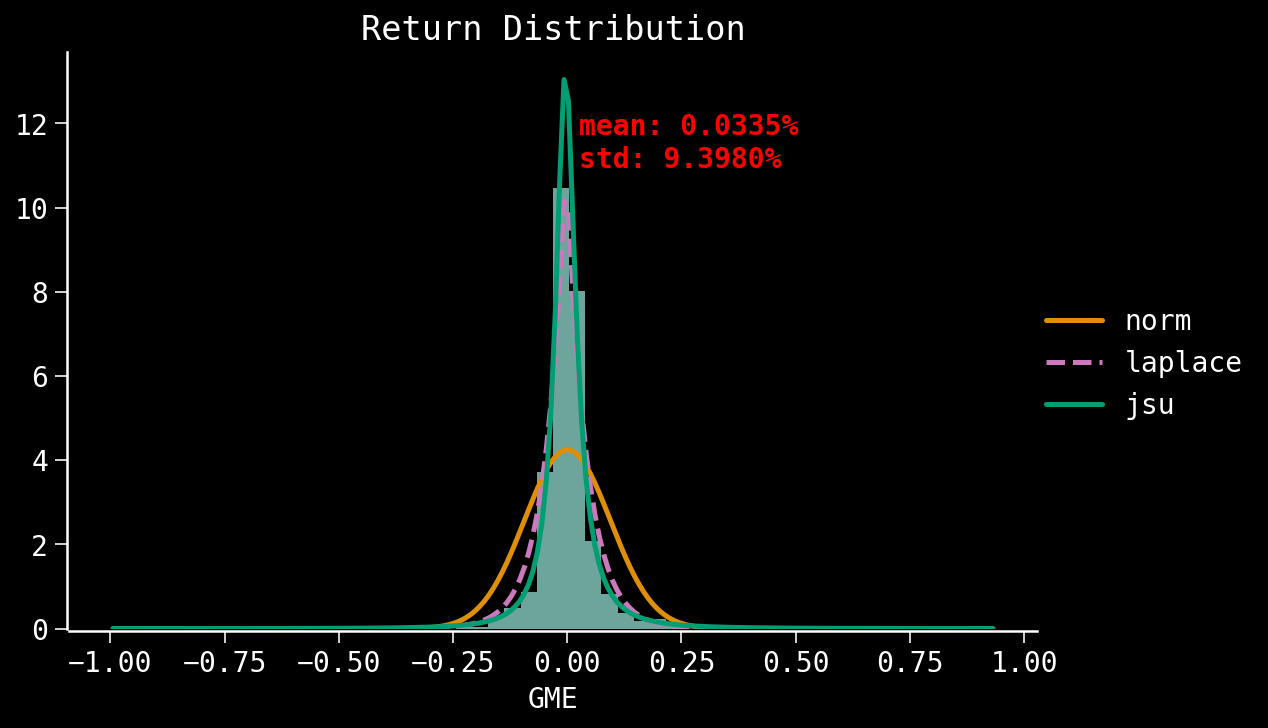

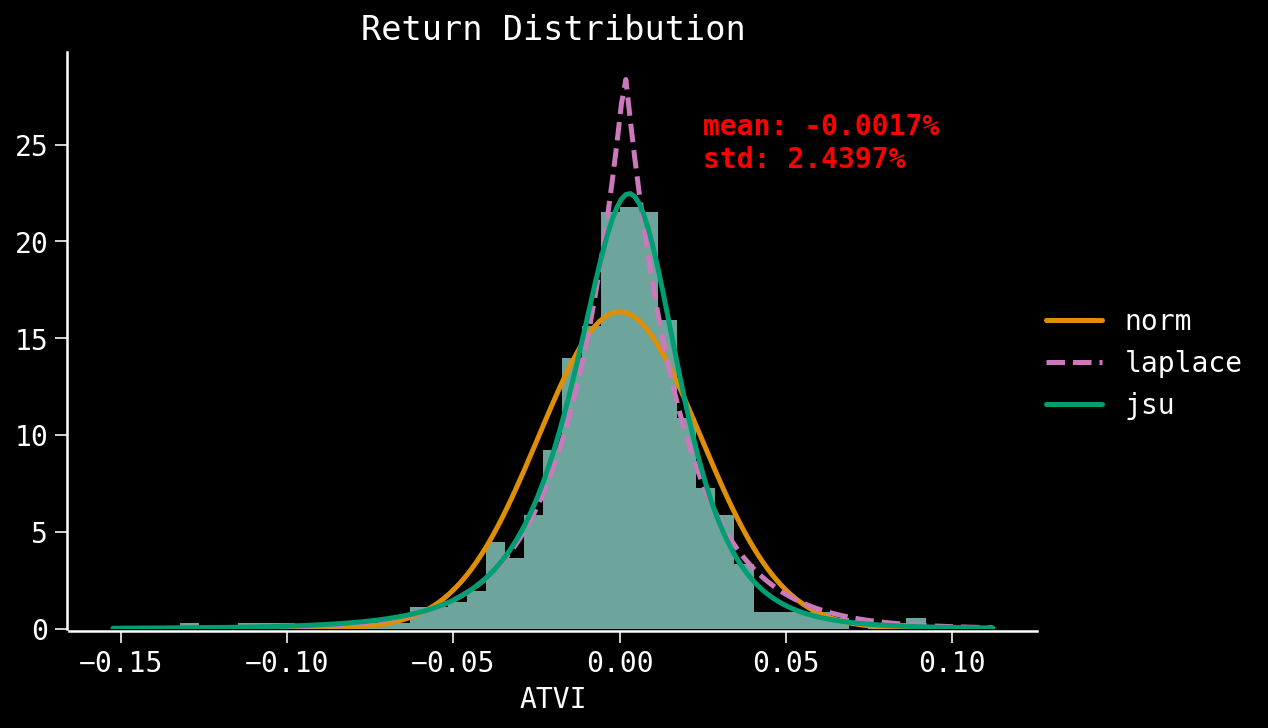

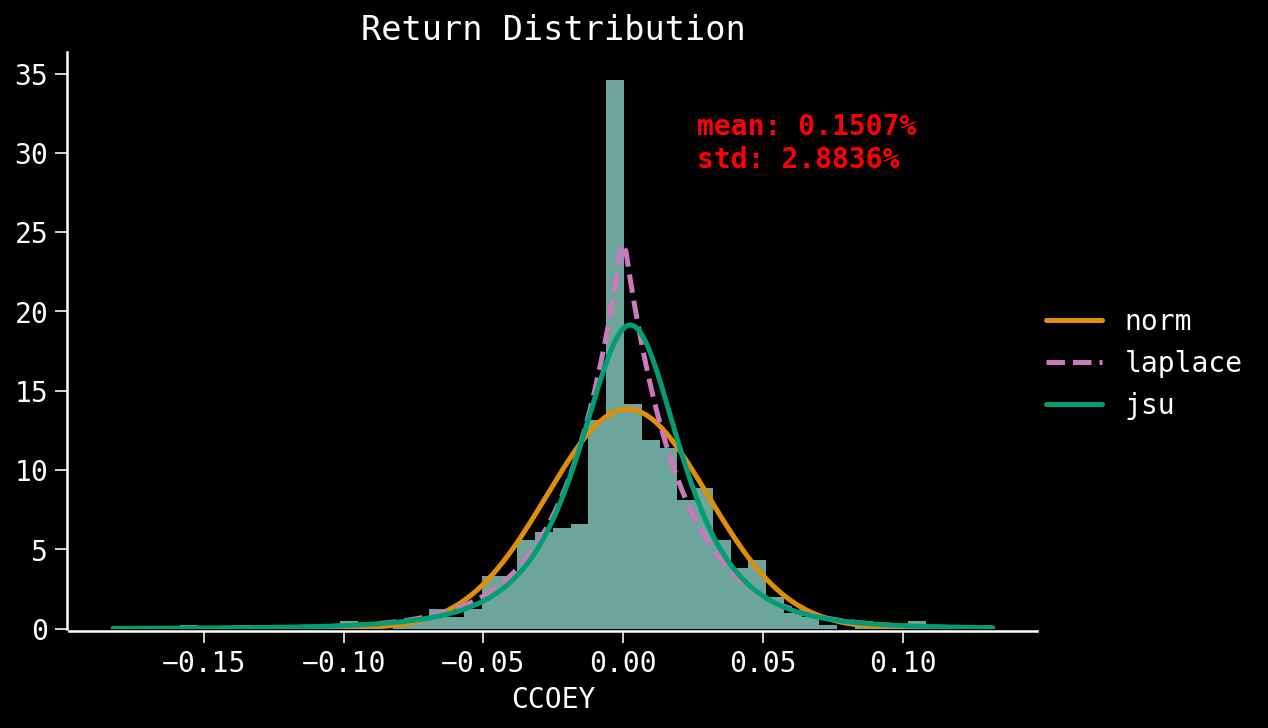

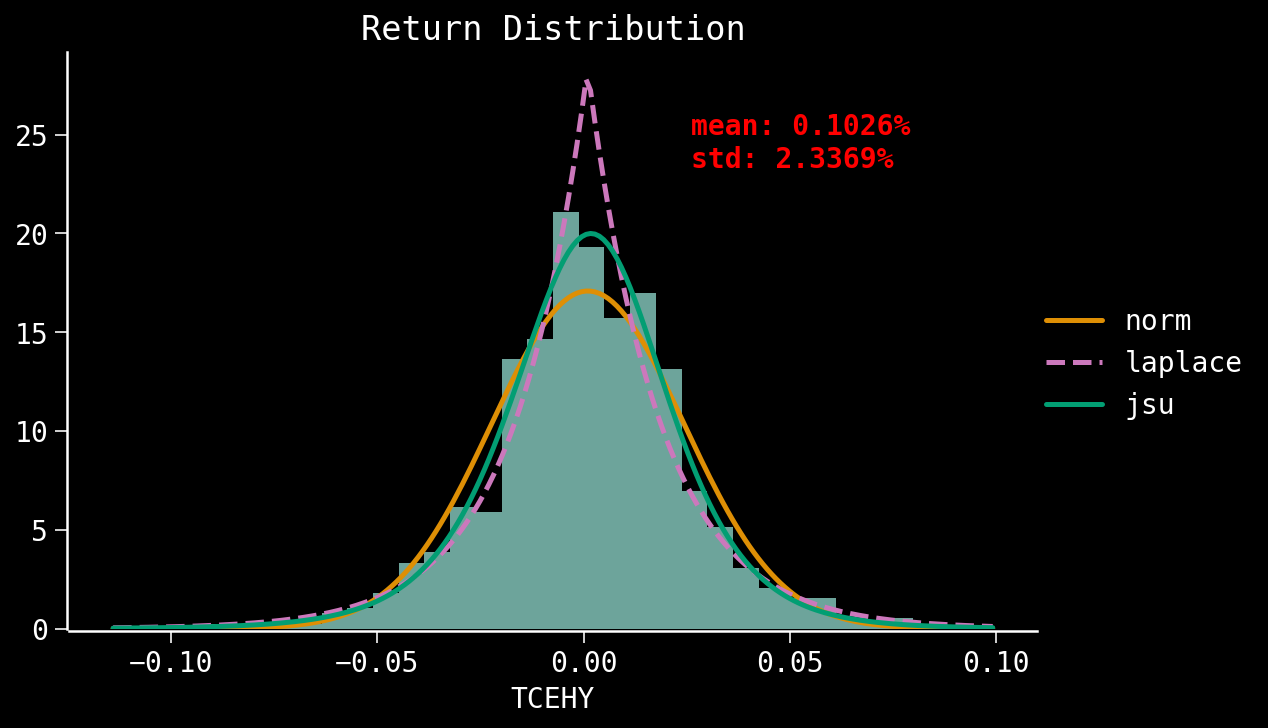

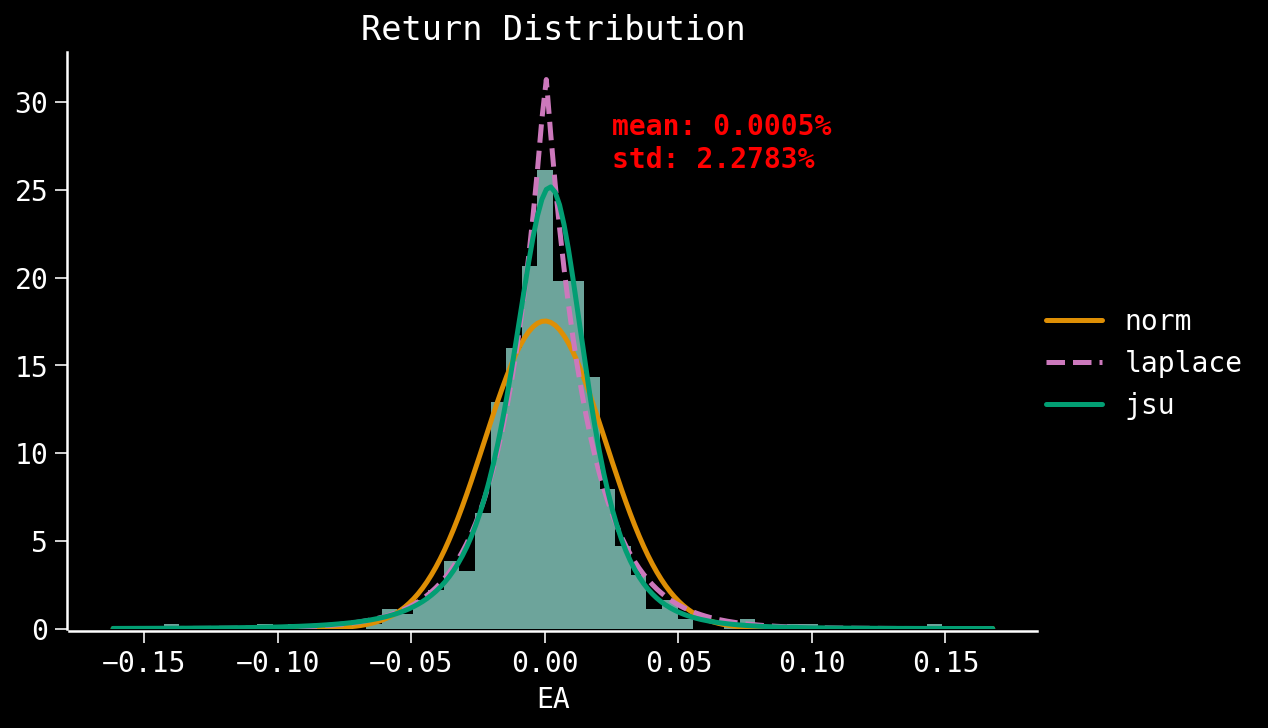

In [47]:
for stk in log_ret:
    plot_dist(log_ret, stk)

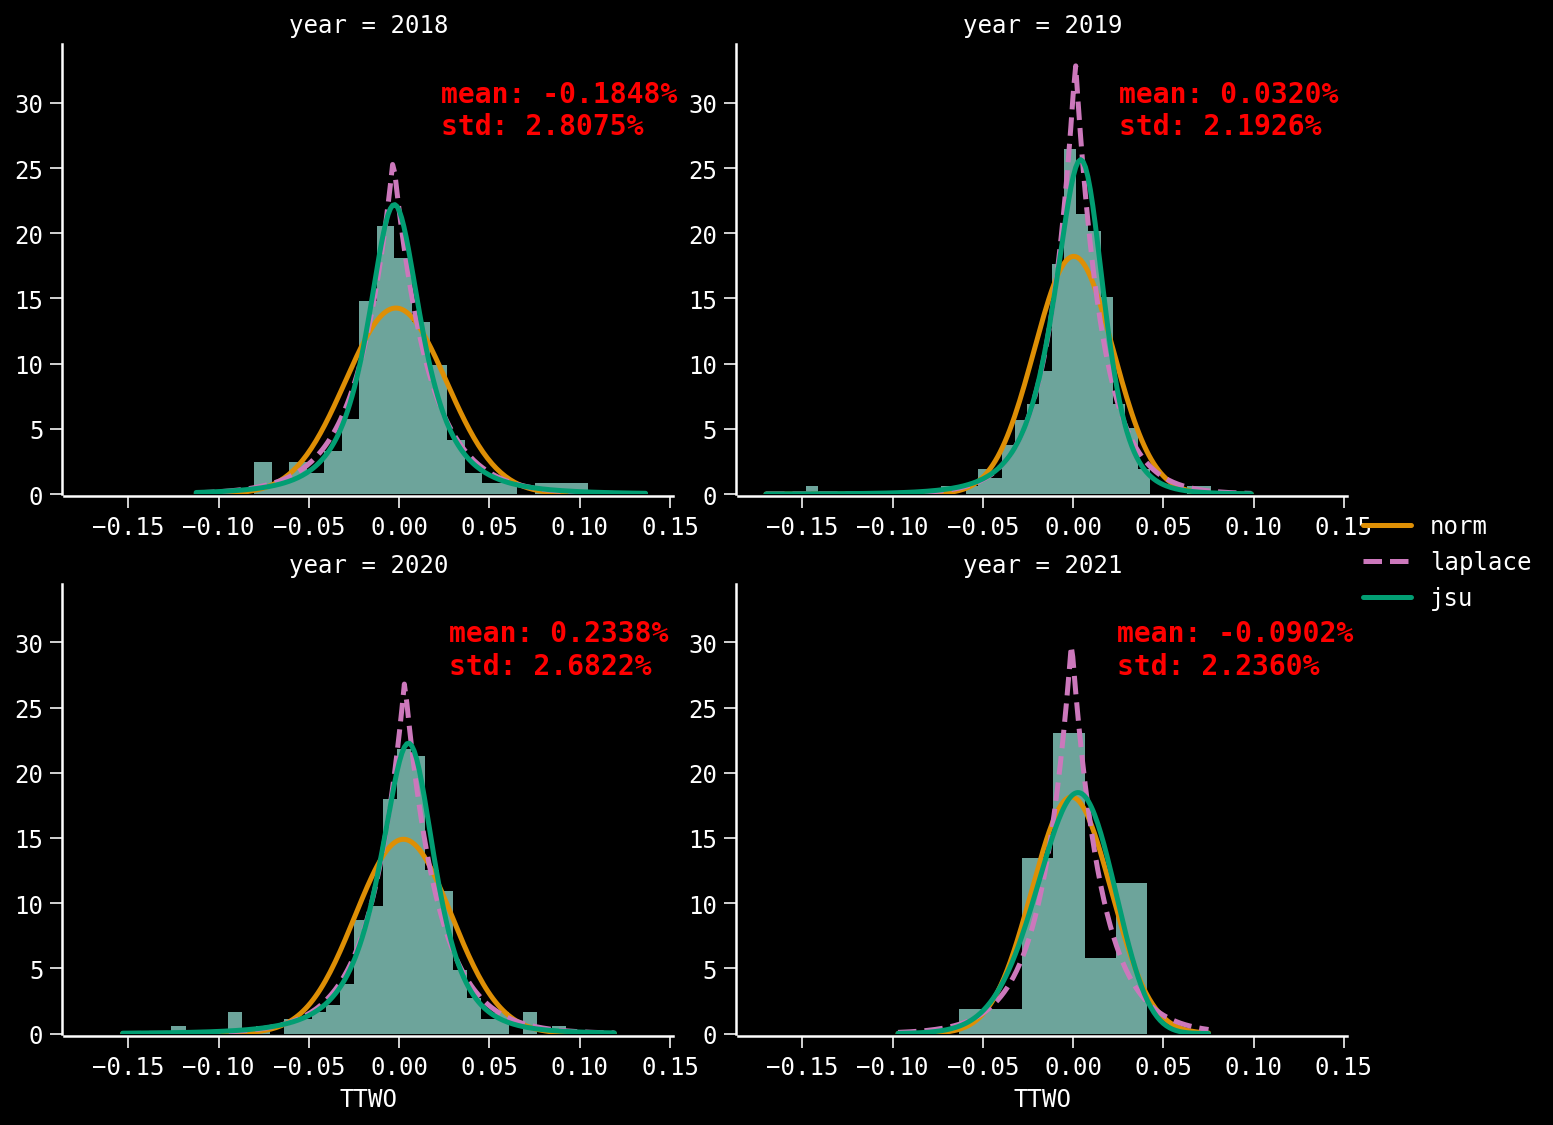

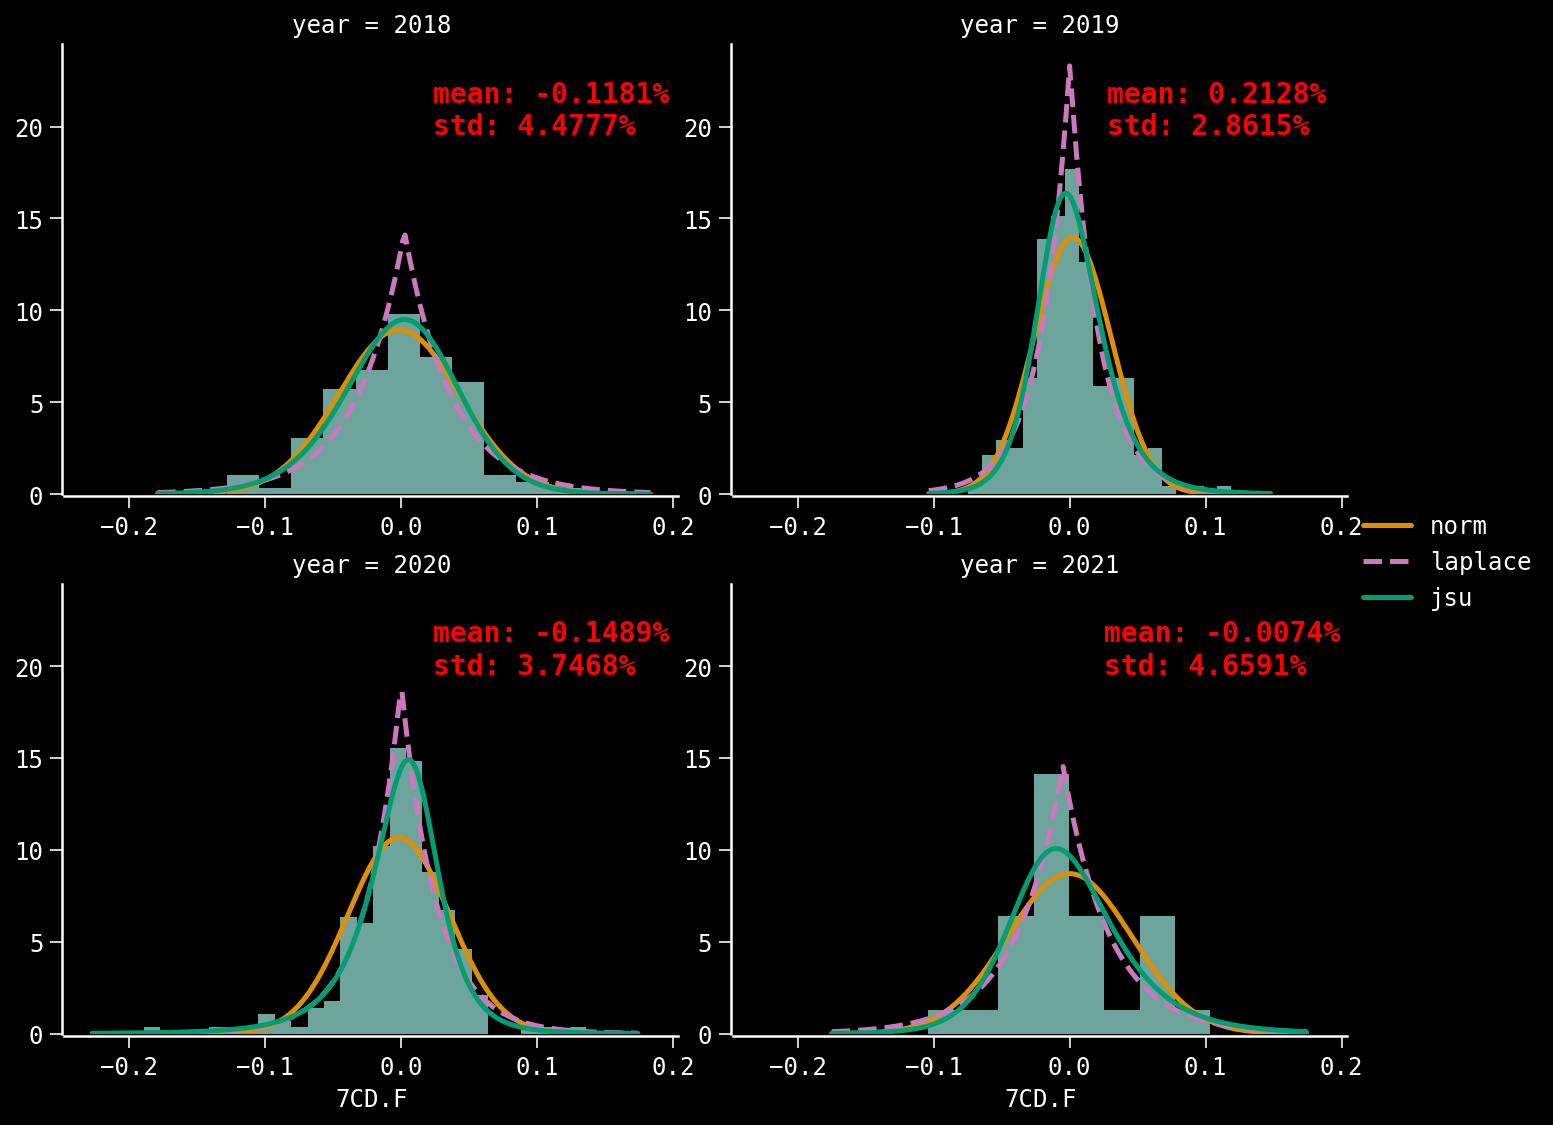

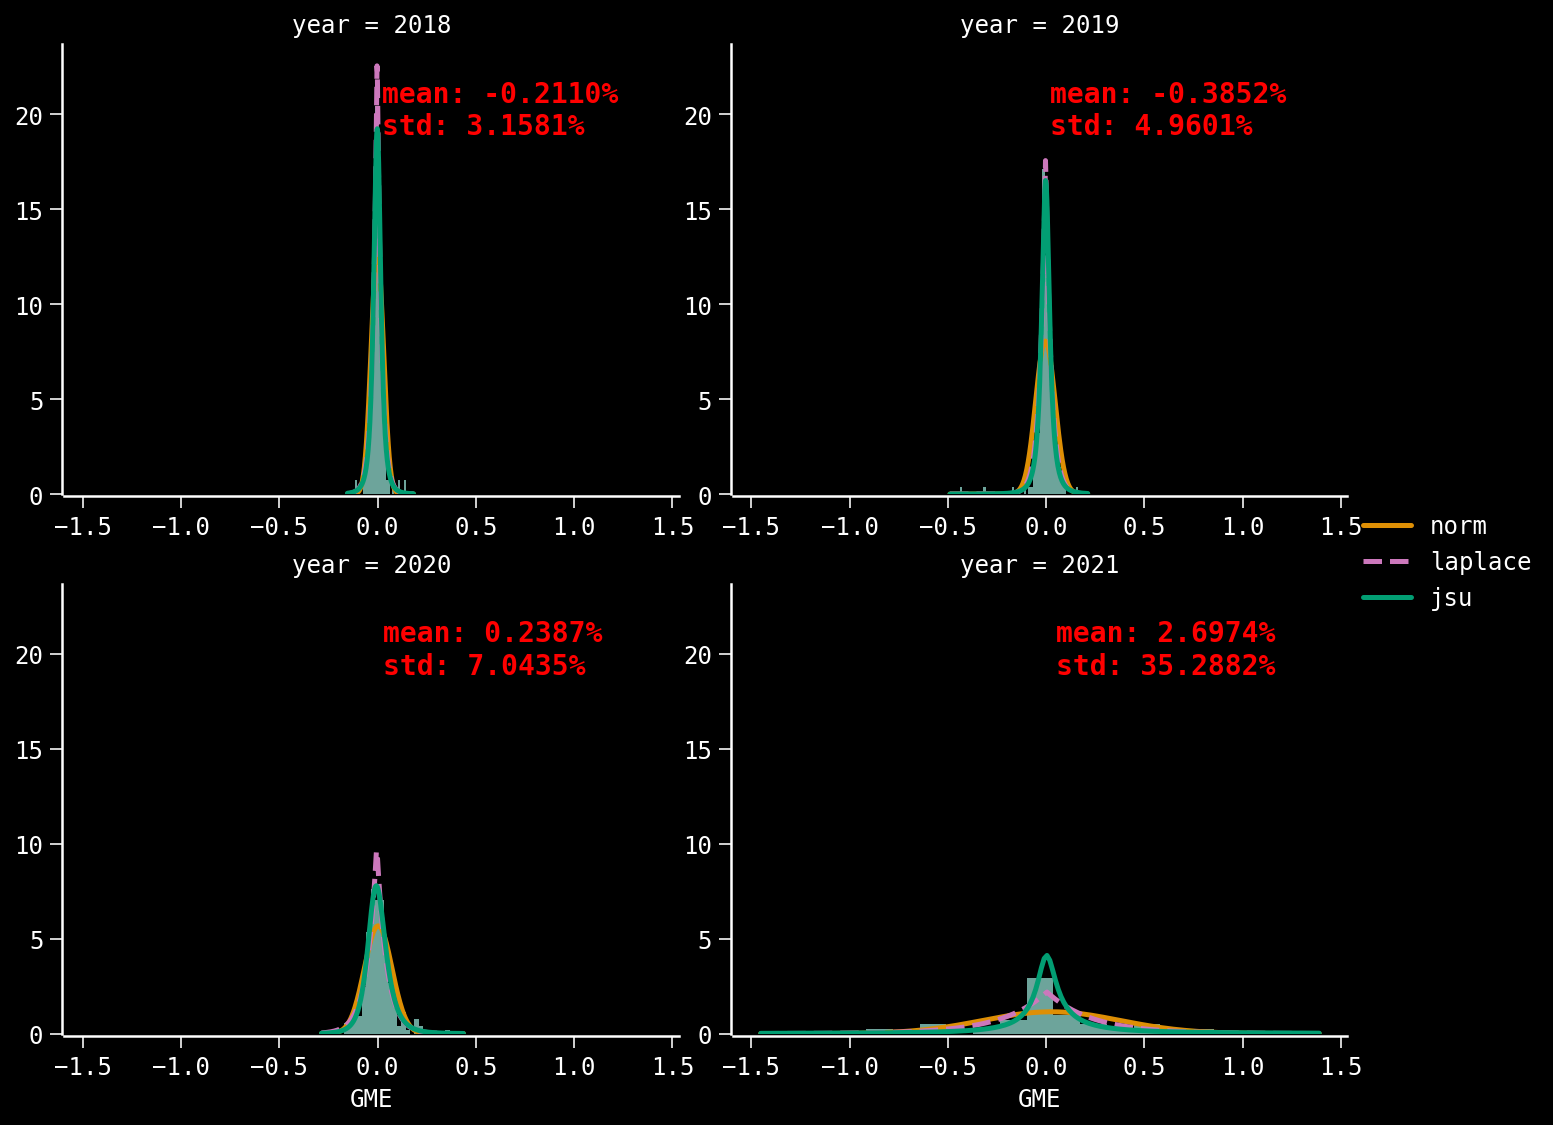

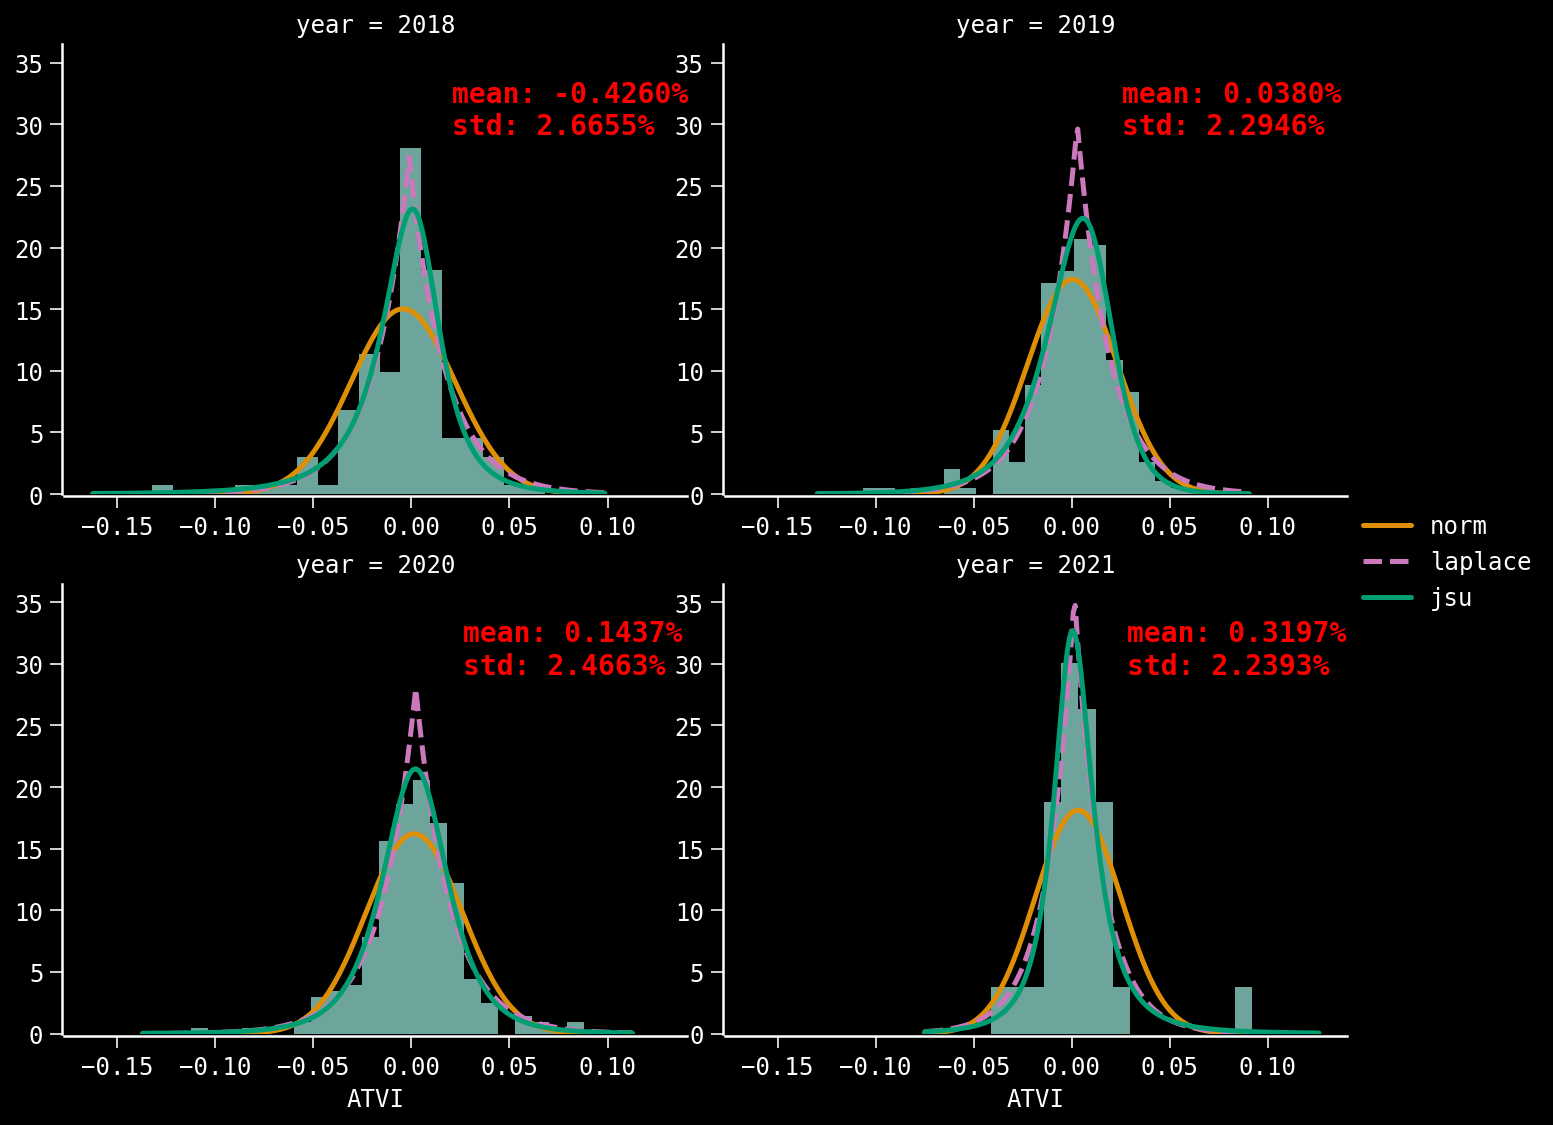

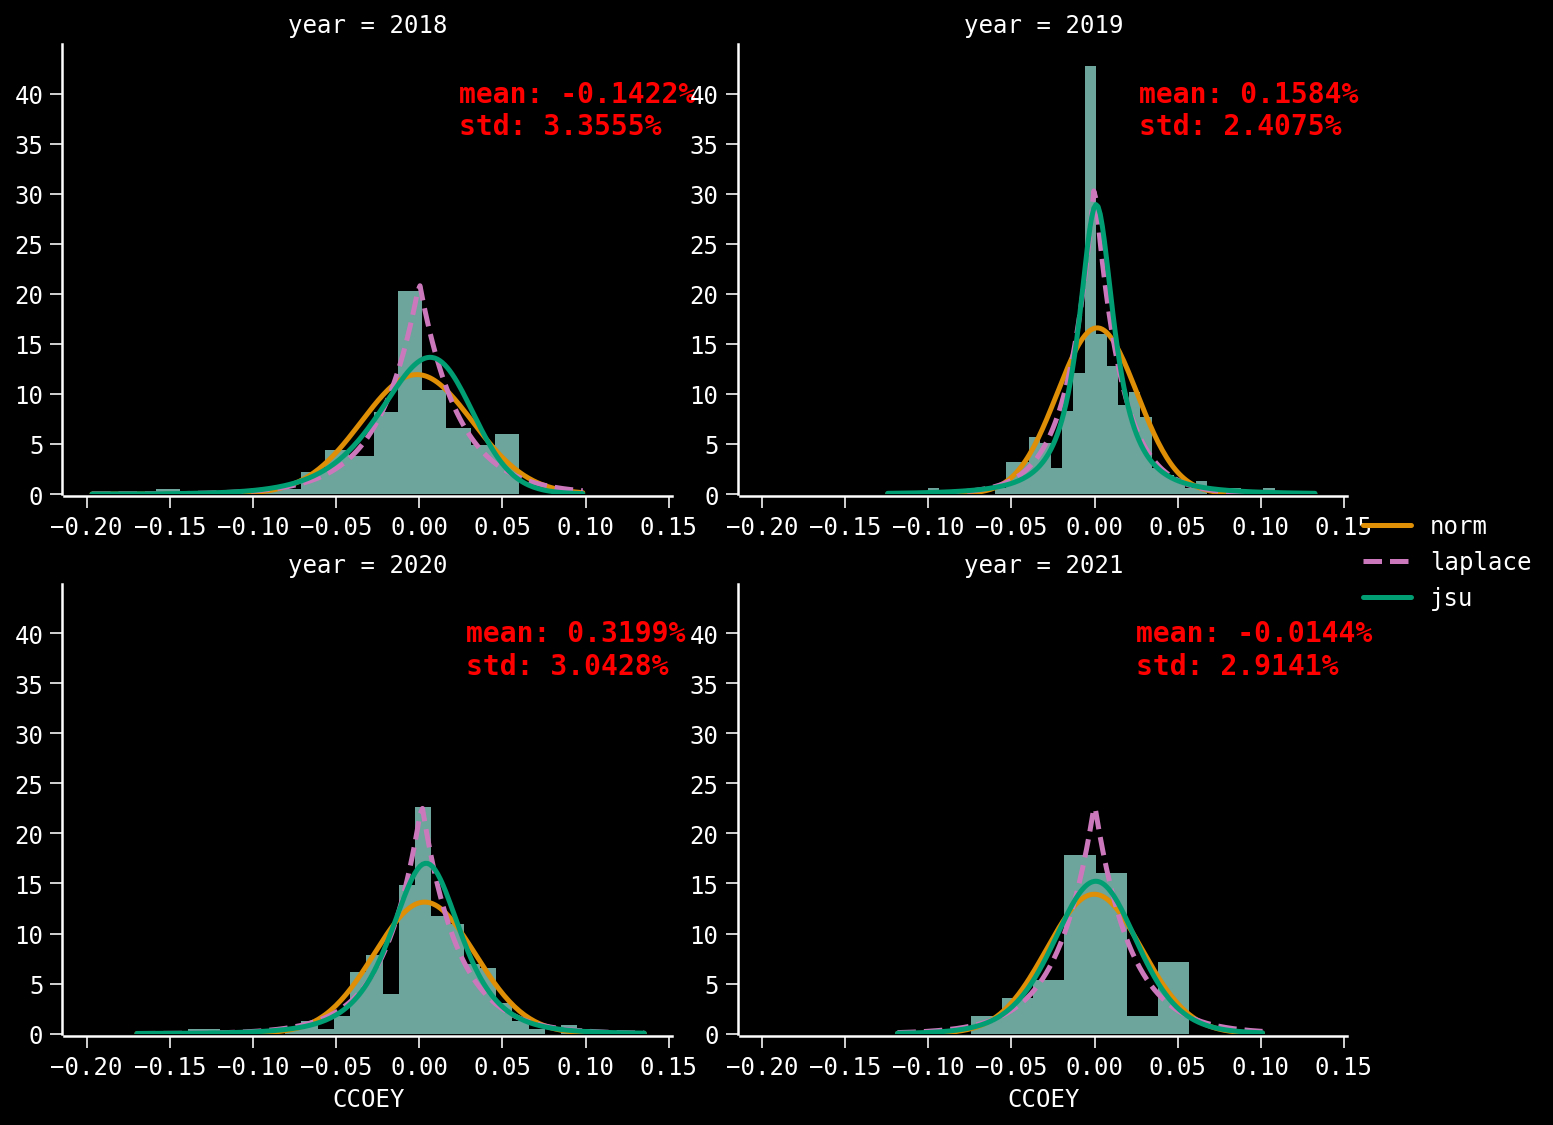

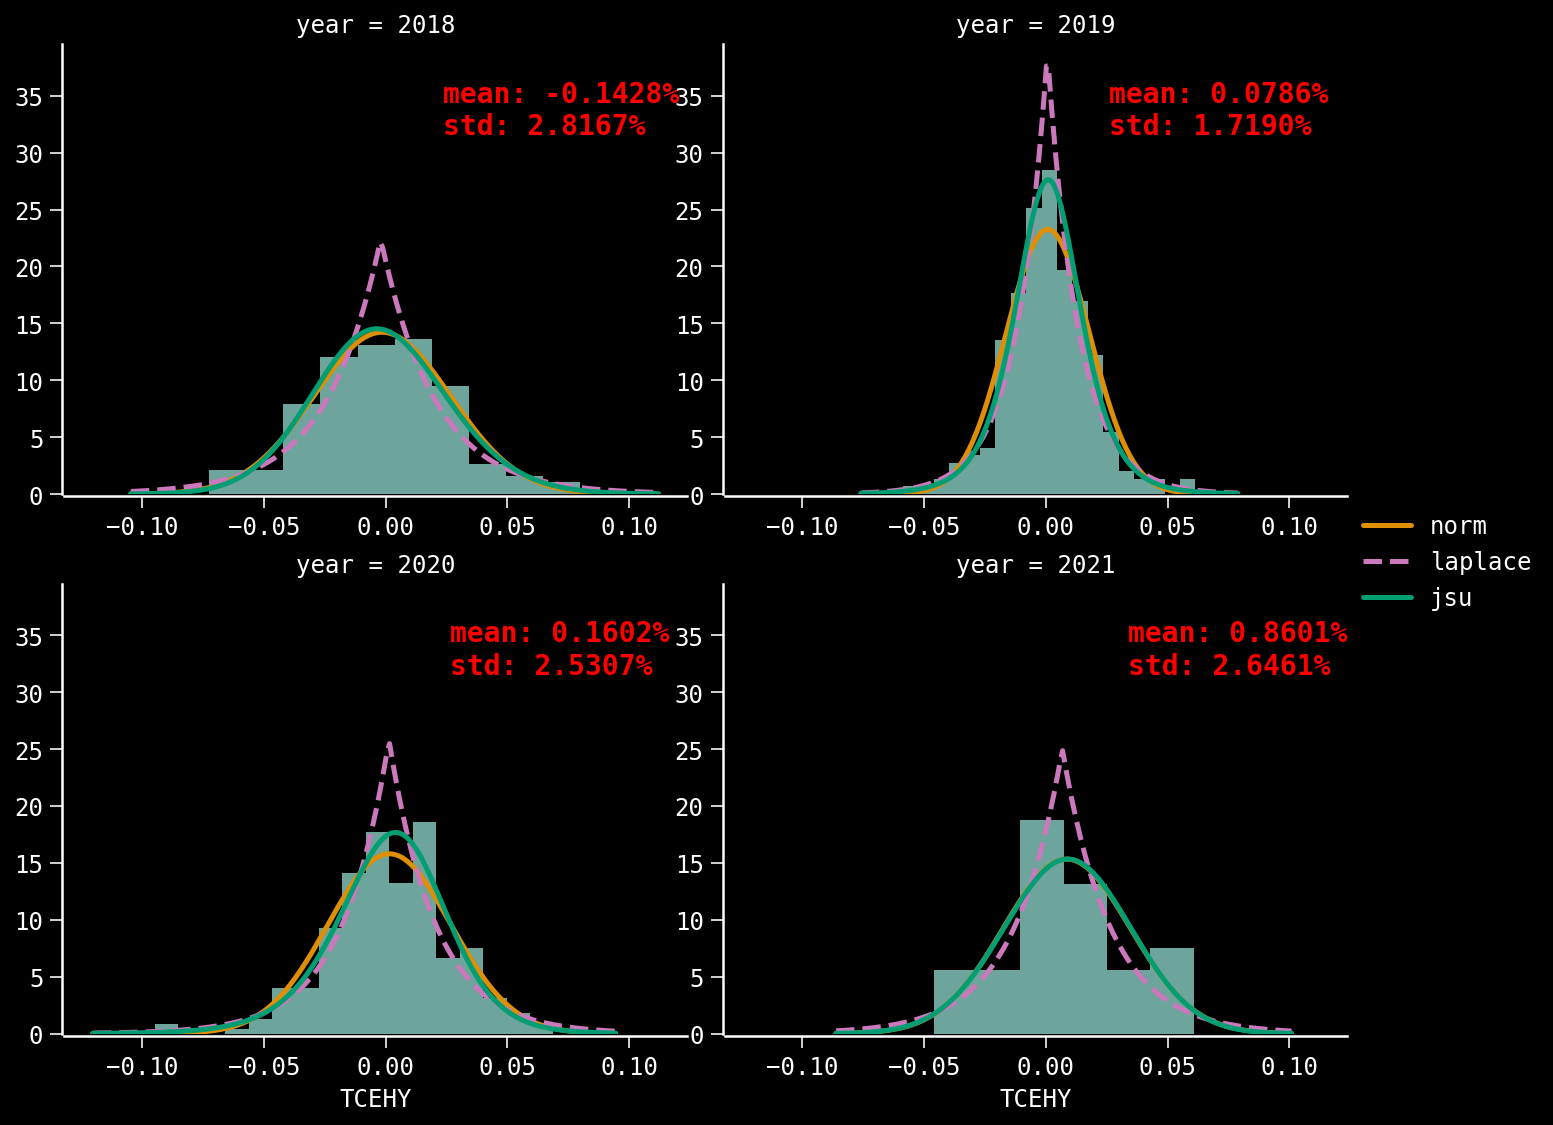

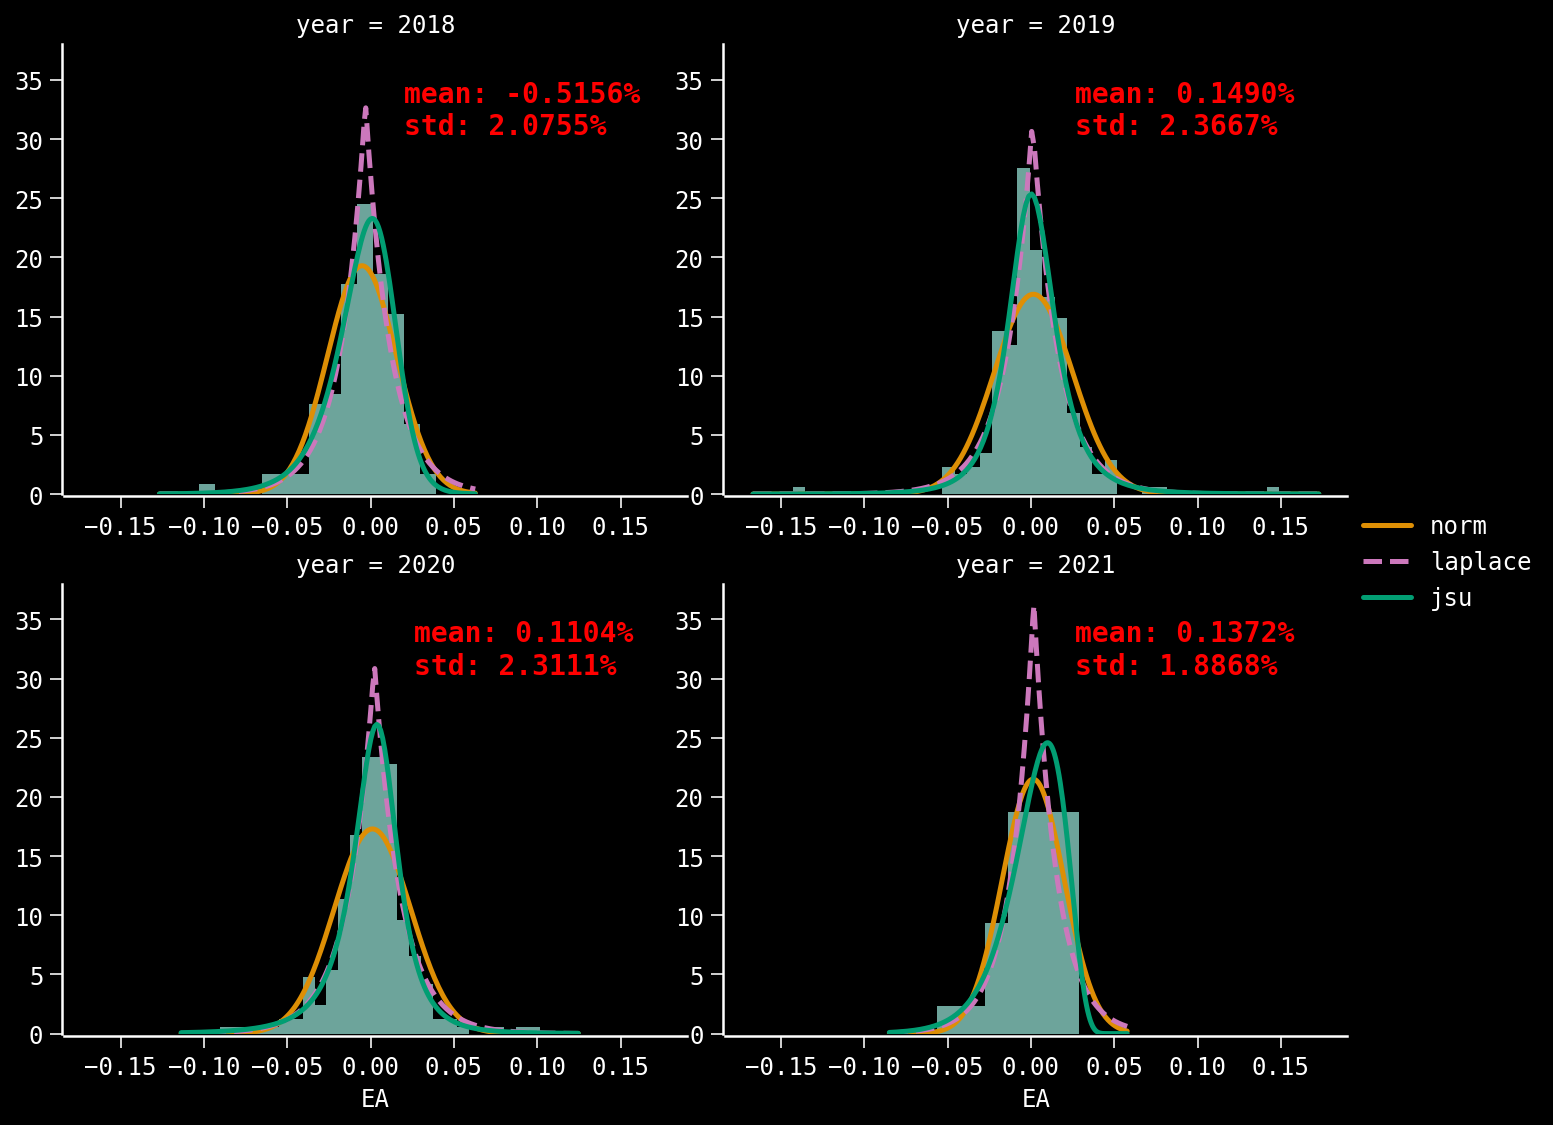

In [48]:
for stk in log_ret:
    plot_facet_hist(log_ret, stk)